In [2]:
###import bibliotecas

import pandas as pd     ### Pandas
import numpy as np      ### Bibliotecas de processamento de dados
import matplotlib.pyplot as mat ### import biblioteca matplotlib
import seaborn as seab  ## Biblioteca de graficos
import os as os         ### Bibliotecas do python, para gerenciar o sistema operacional
from sklearn.model_selection import train_test_split # Dividir amostras

In [36]:
#### Carregar diverços arquivos
caminhoarquivo = '../Desafio_Python_diogo/arquivos/'
os.listdir(caminhoarquivo) ## Verificar os arquivos que contem na pasta

diretorio = []  ## Criando um lista/caminho vazio
for file in os.listdir(caminhoarquivo): ## localizando os arquivos com "os"
    if file.endswith('.xlsx'): ## filtro em string
            print(caminhoarquivo + file)
            diretorio.append(caminhoarquivo + file)
diretorio

[]

In [35]:
### Subir varios arquivos - Abri arquivos e agrupar todos arquivos

arquivos_emp = pd.DataFrame()
for arquivo in diretorio:
    # print(arquivo)
    filearquivos = pd.read_excel(arquivo)
    arquivos_emp = pd.concat([arquivos_emp,filearquivos]) ##pd.concat - comando para juntar dataframe "destino,origem"
print(arquivos_emp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 302840 entries, 0 to 14247
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DataEmissao     302840 non-null  datetime64[ns]
 1   DataVencimento  302840 non-null  datetime64[ns]
 2   NFe             302840 non-null  int64         
 3   cdCliente       302840 non-null  int64         
 4   cdVendedor      302840 non-null  int64         
 5   cdProduto       302840 non-null  int64         
 6   QtdItens        302840 non-null  int64         
 7   ValorUnitario   302840 non-null  float64       
 8   Peso Líquido    302840 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(5)
memory usage: 23.1 MB
None


In [37]:
### Salvar dataframe com arquivos na pasta

arquivos_emp.to_csv('../Desafio_Python_diogo/arquivos/arquivo_consolidado.csv')

In [26]:
### criando novos daframe
## Criar dataframe - Metas

## Criar dataframe - base-meta-new
arquivosmetas = '../Desafio_Python_diogo/arquivos/base-meta-new.xlsx'
arquivosmetas
metas = pd.read_excel(arquivosmetas)
metas = metas.iloc[3:,1:] ## Comando loc, localizar [linha,colunas] - LOC OU ILOC
metas.reset_index(0,drop=True) ## reset.index - recalcular o indice para iniciar do 0
metas.columns=['cdvendedor','data','meta'] ##renomear todas os titulos
print(metas.info()) ##Verificar informações
print(metas.isnull().sum()) ##Verificar Nulos
print(f'Qtde duplicado: {metas.duplicated().sum()}') ## Verificar os itens duplicados, por quantidade

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 3 to 794
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   cdvendedor  792 non-null    object
 1   data        792 non-null    object
 2   meta        792 non-null    object
dtypes: object(3)
memory usage: 18.7+ KB
None
cdvendedor    0
data          0
meta          0
dtype: int64
Qtde duplicado: 0


In [27]:
### Renomear titulos - clientes
arquivosdimensoes = '../Desafio_Python_diogo/arquivos/Dimensões.xlsx'
clientes = pd.read_excel(arquivosdimensoes, sheet_name='Cliente')
clientes.columns = ['cdcliente','razao_social','status','categoria','cidade','uf']
print(clientes.info()) ##Verificar informações
print(clientes.isnull().sum()) ##Verificar Nulos
print(f'Qtde duplicado: {clientes.duplicated().sum()}') ## Verificar os itens duplicados, por quantidade

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1411 entries, 0 to 1410
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cdcliente     1411 non-null   int64 
 1   razao_social  1411 non-null   object
 2   status        1411 non-null   object
 3   categoria     1411 non-null   object
 4   cidade        1411 non-null   object
 5   uf            1411 non-null   object
dtypes: int64(1), object(5)
memory usage: 66.3+ KB
None
cdcliente       0
razao_social    0
status          0
categoria       0
cidade          0
uf              0
dtype: int64
Qtde duplicado: 0


In [28]:
arquivosdimensoes = '../Desafio_Python_diogo/arquivos/Dimensões.xlsx'
Produto = pd.read_excel(arquivosdimensoes, sheet_name='Produto')
Produto.columns = ['cdproduto','descricao','cdgrupo']
print(Produto.info()) ##Verificar informações
print(Produto.isnull().sum()) ##Verificar Nulos
print(f'Qtde duplicado: {Produto.duplicated().sum()}') ## Verificar os itens duplicados, por quantidade

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cdproduto  2736 non-null   int64 
 1   descricao  2736 non-null   object
 2   cdgrupo    2736 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 64.2+ KB
None
cdproduto    0
descricao    0
cdgrupo      0
dtype: int64
Qtde duplicado: 0


In [29]:
arquivosdimensoes = '../Desafio_Python_diogo/arquivos/Dimensões.xlsx'
GrupoProduto = pd.read_excel(arquivosdimensoes, sheet_name='GrupoProduto')
GrupoProduto.columns = ['cdgrupo','grupo','linha']
print(GrupoProduto.info()) ##Verificar informações
print(GrupoProduto.isnull().sum()) ##Verificar Nulos
print(f'Qtde duplicado: {GrupoProduto.duplicated().sum()}') ## Verificar os itens duplicados, por quantidade


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cdgrupo  36 non-null     int64 
 1   grupo    36 non-null     object
 2   linha    36 non-null     object
dtypes: int64(1), object(2)
memory usage: 992.0+ bytes
None
cdgrupo    0
grupo      0
linha      0
dtype: int64
Qtde duplicado: 0


In [30]:
arquivosdimensoes = '../Desafio_Python_diogo/arquivos/Dimensões.xlsx'
Vendedor = pd.read_excel(arquivosdimensoes, sheet_name='Vendedor')
Vendedor.columns = ['cdvendedor','vendedor','cdsupervisor','supervisor','cdgerente','gerente','equipe']
print(Vendedor.info()) ##Verificar informações
print(Vendedor.isnull().sum()) ##Verificar Nulos
print(f'Qtde duplicado: {Vendedor.duplicated().sum()}') ## Verificar os itens duplicados, por quantidade

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cdvendedor    12 non-null     int64 
 1   vendedor      12 non-null     object
 2   cdsupervisor  12 non-null     int64 
 3   supervisor    12 non-null     object
 4   cdgerente     12 non-null     int64 
 5   gerente       12 non-null     object
 6   equipe        12 non-null     object
dtypes: int64(3), object(4)
memory usage: 800.0+ bytes
None
cdvendedor      0
vendedor        0
cdsupervisor    0
supervisor      0
cdgerente       0
gerente         0
equipe          0
dtype: int64
Qtde duplicado: 0


In [31]:
arquivosdimensoes = '../Desafio_Python_diogo/arquivos/Dimensões.xlsx'
Data = pd.read_excel(arquivosdimensoes, sheet_name='Data')
Data.columns = ['data','ano','mes','mesnum','dia']
print(Data.info()) ##Verificar informações
print(Data.isnull().sum()) ##Verificar Nulos
print(f'Qtde duplicado: {Data.duplicated().sum()}') ## Verificar os itens duplicados, por quantidade


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1095 non-null   datetime64[ns]
 1   ano     1095 non-null   int64         
 2   mes     1095 non-null   object        
 3   mesnum  1095 non-null   int64         
 4   dia     1095 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.9+ KB
None
data      0
ano       0
mes       0
mesnum    0
dia       0
dtype: int64
Qtde duplicado: 0


In [39]:
### Verificar alguns dados statisticos
### Analises exploratorioas - Criando um nova variavel
arquivos_emp['valortotal'] = arquivos_emp['QtdItens'] * arquivos_emp['ValorUnitario'] ##Criando variavel valortotal multiplicando duas variaveis
arquivos_emp


,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,valortotal
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,52.98
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,26.64
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,9.60
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,17.52
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,16.86
...,...,...,...,...,...,...,...,...,...,...
14243,2022-03-12,2022-04-14,2173547,673190,265,202,24,1.62,1.50,38.88
14244,2022-03-12,2022-04-14,2173547,673190,265,1154,12,3.25,1.75,39.00
14245,2022-03-12,2022-04-14,2173547,673190,265,668,12,3.26,1.00,39.12
14246,2022-03-12,2022-04-14,2173547,673190,265,1527,12,3.14,1.00,37.68


In [40]:
print(arquivos_emp[['QtdItens','ValorUnitario','valortotal']].sum()) ##Total das variaveis (count/sum)
# arquivos_emp_g = arquivos_emp.groupby('Mês')['ValorVenda'].sum()

# metas.describe()
# clientes.describe()
# Produto.describe()
# GrupoProduto.describe()
# Vendedor.describe()
# Data.describe()

QtdItens          7428139.00
ValorUnitario     2077072.83
valortotal       21047835.52
dtype: float64


In [41]:
### Cruzar tabelas = left sql ou procv no excel
arquivomarge = arquivos_emp2 = pd.merge(
    arquivos_emp ##Tabela da esquerda(principal)
    ,Data ##Tabela da esquerda(auxiliar)
    ### cheves primarias para cruzamento "on" no sql
    ,left_on='DataEmissao' ##Variavel de cruzamento da principal
    ,right_on='data' ##Variavel de cruzamento da auxiliar
    
) ##.loc[:,['DataEmissao','ano']]

# print(arquivomarge.info())
# print(Data.info())

arquivomarge


,DataEmissao,DataVencimento,NFe,cdCliente,cdVendedor,cdProduto,QtdItens,ValorUnitario,Peso Líquido,valortotal,data,ano,mes,mesnum,dia
0,2017-01-12,2017-02-22,1492762,3140218,265,1073,6,8.83,0.60,52.98,2017-01-12,2017,Janeiro,1,12
1,2017-01-12,2017-02-22,1492762,3140218,265,1420,6,4.44,5.40,26.64,2017-01-12,2017,Janeiro,1,12
2,2017-01-12,2017-02-22,1492762,3140218,265,264,10,0.96,1.92,9.60,2017-01-12,2017,Janeiro,1,12
3,2017-01-13,2017-01-29,1492719,2983332,265,1154,6,2.92,1.26,17.52,2017-01-13,2017,Janeiro,1,13
4,2017-01-13,2017-01-29,1492719,2983332,265,1527,6,2.81,1.40,16.86,2017-01-13,2017,Janeiro,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260091,2019-03-12,2019-04-14,2173547,673190,265,202,24,1.62,1.50,38.88,2019-03-12,2019,Março,3,12
260092,2019-03-12,2019-04-14,2173547,673190,265,1154,12,3.25,1.75,39.00,2019-03-12,2019,Março,3,12
260093,2019-03-12,2019-04-14,2173547,673190,265,668,12,3.26,1.00,39.12,2019-03-12,2019,Março,3,12
260094,2019-03-12,2019-04-14,2173547,673190,265,1527,12,3.14,1.00,37.68,2019-03-12,2019,Março,3,12


In [47]:
### Cruzar tabelas = left sql ou procv no excel
arquivomarge_result = pd.merge(
    arquivos_emp[['DataEmissao','QtdItens','ValorUnitario','valortotal']] ##Tabela da esquerda(principal) - Chamando apenas as variaveis que preciso
    ,Data[['data','ano']] ##Tabela da esquerda(auxiliar) - Chamando apenas as variaveis que preciso
    ### cheves primarias para cruzamento "on" no sql
    ,left_on='DataEmissao' ##Variavel de cruzamento da principal
    ,right_on='data' ##Variavel de cruzamento da auxiliar
)

# print(arquivomarge.info())
# print(Data.info())

arquivomarge_result


,DataEmissao,QtdItens,ValorUnitario,valortotal,data,ano
0,2017-01-12,6,8.83,52.98,2017-01-12,2017
1,2017-01-12,6,4.44,26.64,2017-01-12,2017
2,2017-01-12,10,0.96,9.60,2017-01-12,2017
3,2017-01-13,6,2.92,17.52,2017-01-13,2017
4,2017-01-13,6,2.81,16.86,2017-01-13,2017
...,...,...,...,...,...,...
260091,2019-03-12,24,1.62,38.88,2019-03-12,2019
260092,2019-03-12,12,3.25,39.00,2019-03-12,2019
260093,2019-03-12,12,3.26,39.12,2019-03-12,2019
260094,2019-03-12,12,3.14,37.68,2019-03-12,2019


In [54]:
arquivomarge_groupby1 = arquivomarge_result.groupby('ano')[['valortotal']].sum().reset_index()
arquivomarge_groupby1


,ano,valortotal
0,2017,6648222.05
1,2018,10214809.43
2,2019,1046201.01


In [52]:

arquivomarge_groupby2=arquivomarge_result[['ano','valortotal']].groupby('ano').sum().reset_index()
arquivomarge_groupby2

,ano,valortotal
0,2017,6648222.05
1,2018,10214809.43
2,2019,1046201.01


<function matplotlib.pyplot.show(close=None, block=None)>

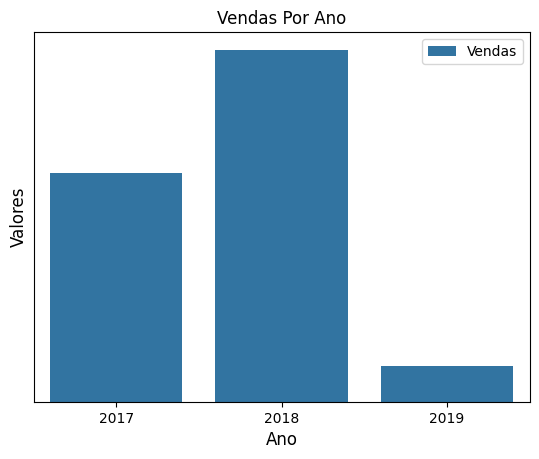

In [95]:
### Gerar um grafico de barras ára apresentar as vendas

seab.barplot(
    data=arquivomarge_groupby2
    ,x='ano'
    ,y='valortotal'
    ,label='Vendas' #Legenda dos dados
)
mat.title('Vendas Por Ano', fontsize = 12) #Titulo do Grafico
mat.xlabel('Ano', fontsize = 12) # Titulo de eixo
# mat.xticks(fontsize = 8, color='blue') # Alterado cores do nome do eixo
# mat.xticks([]) #Retirar os valores do eixo X

mat.ylabel('Valores', fontsize = 12) # Titulo de eixo
# mat.yticks(fontsize = 8, color='blue') # Alterado cores do nome do eixo
mat.yticks([]) #Retirar os valores do eixo X
# mat.axis('off') #Retirar os valores do eixo
mat.legend()
mat.show


In [88]:
##Convertendo dados tipo data

# metas['data']=metas['data'].astype('datetime64[ns]')
metas['meta']=metas['meta'].astype('float64')

metas.info()
# arquivomarge_groupby2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 3 to 794
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cdvendedor  792 non-null    object        
 1   data        792 non-null    datetime64[ns]
 2   meta        792 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 18.7+ KB


In [89]:
### Cruzando Meta com Data
### Cruzar tabelas = left sql ou procv no excel
metas_result = pd.merge(
    metas[['cdvendedor','data','meta']] ##Tabela da esquerda(principal) - Chamando apenas as variaveis que preciso
    ,Data[['data','ano']] ##Tabela da esquerda(auxiliar) - Chamando apenas as variaveis que preciso
    ### cheves primarias para cruzamento "on" no sql
    ,left_on='data' ##Variavel de cruzamento da principal
    ,right_on='data' ##Variavel de cruzamento da auxiliar
)

# print(arquivomarge.info())
# print(Data.info())

metas_result


,cdvendedor,data,meta,ano
0,102,2017-01-01,140768.312981,2017
1,125,2017-01-01,21525.584613,2017
2,144,2017-01-01,72301.437981,2017
3,194,2017-01-01,0.000000,2017
4,196,2017-01-01,75253.911490,2017
...,...,...,...,...
391,265,2019-12-01,100401.000000,2019
392,285,2019-12-01,72087.000000,2019
393,326,2019-12-01,80076.000000,2019
394,660,2019-12-01,25869.000000,2019


In [90]:

metas_result_groupby2=metas_result[['ano','meta']].groupby('ano').sum().reset_index()
metas_result_groupby2

,ano,meta
0,2017,1.174900e+07
1,2018,1.208240e+07
2,2019,1.075291e+07


<function matplotlib.pyplot.show(close=None, block=None)>

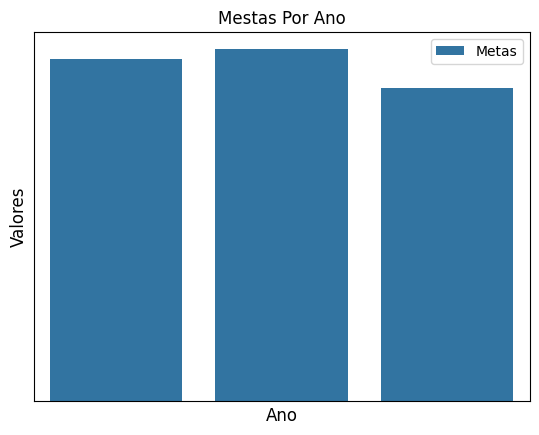

In [94]:
### Gerar um grafico de barras ára apresentar as vendas

seab.barplot(
    data=metas_result_groupby2
    ,x='ano'
    ,y='meta'
    ,label='Metas' #Legenda dos dados
)
mat.title('Mestas Por Ano', fontsize = 12) #Titulo do Grafico
mat.xlabel('Ano', fontsize = 12) # Titulo de eixo
# mat.xticks([]) #Retirar os valores do eixo X
# mat.xticks(fontsize = 8, color='blue') # Alterado cores do nome do eixo

mat.ylabel('Valores', fontsize = 12) # Titulo de eixo
# mat.yticks(fontsize = 8, color='blue') # Alterado cores do nome do eixo
mat.yticks([]) #Retirar os valores do eixo Y
# mat.axis('off') #Retirar os valores do eixo
mat.yticks([]) #Retirar os valores do eixo Y
mat.legend()
mat.show


In [75]:
metas.info()
# Data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 3 to 794
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   cdvendedor  792 non-null    object        
 1   data        792 non-null    datetime64[ns]
 2   meta        792 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 18.7+ KB


In [73]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   data    1095 non-null   datetime64[ns]
 1   ano     1095 non-null   int64         
 2   mes     1095 non-null   object        
 3   mesnum  1095 non-null   int64         
 4   dia     1095 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.9+ KB
